Questo notebook fornisce una panoramica completa degli strumenti e dei concetti essenziali per lo sviluppo moderno in Python, in particolare per la data science e il machine learning.

## 1. Ambienti Virtuali Python

### Cos'è un Ambiente Virtuale?
Un ambiente virtuale Python è un ambiente isolato per i progetti Python. Ciò significa che ogni progetto può avere le proprie dipendenze, indipendentemente dalle dipendenze di ogni altro progetto.

### Perché Usare un Ambiente Virtuale?
- **Gestione delle Dipendenze**: Previene i conflitti tra le dipendenze dei progetti. Ad esempio, il Progetto A potrebbe aver bisogno della versione 1.0 di una libreria, mentre il Progetto B ha bisogno della versione 2.0.
- **Riproducibilità**: Rende più facile replicare l'ambiente del progetto su un'altra macchina.
- **Python di Sistema**: Mantiene la tua installazione globale di Python pulita e libera da pacchetti specifici del progetto.

### Creare un Ambiente Virtuale con `venv`
Python include un modulo nativo chiamato `venv` per creare ambienti virtuali.

In pratica è una cartella che contiene i moduli per il workspace del progetto.
Generalmente la cartella per il virtual environment viene indicato anch'esso venv/ o .venv/

### Attivare un Ambiente Virtuale

In [ ]:
# Su Windows
# !venv\Scripts\activate

# Su macOS e Linux
# !source venv/bin/activate

### Usare un Ambiente Virtuale in un Jupyter Notebook
Per utilizzare un ambiente virtuale all'interno di un Jupyter Notebook, è necessario installare il pacchetto `ipykernel` e creare un nuovo kernel per il tuo ambiente.

Vediamo in seguito come si possono installare pacchetti con il gestore di pacchetti `uv`

## 2. `uv`: Il Gestore di Pacchetti Python

`uv` ([link](https://docs.astral.sh/uv/getting-started/)) è un gestore di pacchetti e progetti Python estremamente veloce. Mira a essere un unico strumento per sostituire `pip`, `pip-tools`, `virtualenv` e altro. È progettato per essere un sostituto diretto dei comandi comuni di `pip`, `pip-tools` e `virtualenv`.

### Caratteristiche Principali di `uv`:
- **Velocità**: È da 10 a 100 volte più veloce di `pip`.
- **Tutto-in-uno**: Gestisce pacchetti, ambienti virtuali e dipendenze di progetto.
- **Efficienza dello Spazio su Disco**: Utilizza una cache globale per la deduplicazione delle dipendenze.

### Installare `uv`

In [ ]:
# Su macOS e Linux
# !curl -LsSf https://astral.sh/uv/install.sh | sh

# Su Windows (in PowerShell)
# powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"

### Inizializzare il workspace con `uv`

In [ ]:
# Crea e attiva un ambiente virtuale
!uv init
!uv run main.py

il comando `uv init` inizializza il workspace, definendo alcuni file, tra cui:
- .gitignore, per excludere file temporanei o cache generati da python da git
- .python-version, che indica la versione di python (molto comodo per cambiare versione di python)
- main.py, eventuale entry point 
- pyproject.toml, definisce le dipendenze dei progetti, e una serie info sul progetto
- README.md, solito README dei progetti

il comando `uv run main.py` fa una serie di cose:
- inizializza il virtualenv come `.venv/` (se non esiste gia')
- attiva il virtualenv
- controlla che la versioen dei moduli installati siano coerenti con quelli indicati nel .toml, ed eventualmente aggiorna la versione dei moduli
- runna il codice `main.py` sotto il virtualenv


### Per installare pacchetti con `uv`

In [ ]:
# Installa un pacchetto (es. torch), e aggiorna le dipendenze nel pyproject.toml
!uv add torch, numpy, matplotlib

Oppure modificare direttamente pyproject.toml aggiungendo i moduli che servono in `dependencies`, ed

In [32]:
# per aggiornare le dipendenze del progetto (solo se hai modificato manualmente il pyproject.toml)
# !uv sync

## 3. Concetti Fondamentali sui Tensori

### Cos'è un Tensore?
Un tensore è un array multidimensionale di dati numerici. È una generalizzazione di vettori e matrici a un numero arbitrario di dimensioni. I tensori sono la struttura dati fondamentale in PyTorch e in altri framework di deep learning.

#### Terminologia dei Tensori:
- **Scalare**: Un tensore a 0 dimensioni (un singolo numero).
- **Vettore**: Un tensore a 1 dimensione.
- **Matrice**: Un tensore a 2 dimensioni.
- **Tensore 3D**: Un array a 3 dimensioni.

### Creare Tensori con PyTorch

In [1]:
import torch

In [2]:
# Crea un tensore da una lista Python
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"Tensore da dati:\n {x_data}")

Tensore da dati:
 tensor([[1, 2],
        [3, 4]])


In [3]:
# Crea un tensore di una forma specifica riempito di uni
ones_tensor = torch.ones((2, 3)) # una tupla che definisce la forma
print(f"Tensore di uni:\n {ones_tensor}")

Tensore di uni:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
# Crea un tensore di una forma specifica con valori casuali
random_tensor = torch.rand((2, 3))
print(f"Tensore Casuale:\n {random_tensor}")

Tensore Casuale:
 tensor([[0.2636, 0.1148, 0.8734],
        [0.0462, 0.6495, 0.7877]])


### Attributi dei Tensori

In [5]:
tensor = torch.rand(3, 4)

print(f"Forma del tensore: {tensor.shape}")
print(f"Tipo di dati del tensore: {tensor.dtype}")
print(f"Dispositivo su cui è memorizzato il tensore: {tensor.device}")

Forma del tensore: torch.Size([3, 4])
Tipo di dati del tensore: torch.float32
Dispositivo su cui è memorizzato il tensore: cpu


### Operazioni sui Tensori

In [6]:
# Indicizzazione e slicing standard, simili a numpy
tensor = torch.ones(4, 4)
tensor[:, 1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [7]:
# Unire i tensori
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [8]:
# Moltiplicazione elemento per elemento
print(f"tensor.mul(tensor): \n {tensor.mul(tensor)}")
# Sintassi alternativa
print(f"tensor * tensor: \n {tensor * tensor}")

tensor.mul(tensor): 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor * tensor: 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
# Moltiplicazione tra matrici
print(f"tensor.matmul(tensor.T): \n {tensor.matmul(tensor.T)}")
# Sintassi alternativa
print(f"tensor @ tensor.T: \n {tensor @ tensor.T}")

tensor.matmul(tensor.T): 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor @ tensor.T: 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


## 4. Introduzione a PyTorch

PyTorch è un framework open-source di machine learning che permette di costruire e addestrare reti neurali in modo efficiente. È noto per la sua flessibilità e il suo grafo computazionale dinamico.

### Caratteristiche Principali di PyTorch:
- **Grafo Computazionale Dinamico**: PyTorch costruisce il grafo computazionale al volo (on-the-fly), il che lo rende più intuitivo per la costruzione e il debug dei modelli.
- **Accelerazione GPU**: Si integra perfettamente con CUDA per calcoli più veloci su GPU.
- **Librerie Estese**: Fornisce una vasta gamma di modelli e dataset pre-costruiti.

### Differenziazione Automatica con `torch.autograd`

Una caratteristica chiave di PyTorch è `torch.autograd`, il suo motore di differenziazione automatica. Tiene traccia di tutte le operazioni sui tensori e può calcolare automaticamente i gradienti.

In [10]:
x = torch.ones(5)  # tensore di input
y = torch.zeros(3)  # output atteso
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [11]:
print(f"Funzione gradiente per z = {z.grad_fn}")
print(f"Funzione gradiente per la loss = {loss.grad_fn}")

Funzione gradiente per z = <AddBackward0 object at 0x71fcb7babd30>
Funzione gradiente per la loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x71fe44f87190>


In [12]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3315, 0.1441, 0.2783],
        [0.3315, 0.1441, 0.2783],
        [0.3315, 0.1441, 0.2783],
        [0.3315, 0.1441, 0.2783],
        [0.3315, 0.1441, 0.2783]])
tensor([0.3315, 0.1441, 0.2783])


### Costruire una Semplice Rete Neurale in PyTorch

In [13]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.net(x)
        return logits

### e una loss function, per esempio vogliamo fare classificazione binaria, e quindi usiamo la BinaryCrossEntropy

In [19]:
loss_fn = nn.BCEWithLogitsLoss()

In [39]:
# istanziamo il modello
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (net): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


### Generiamo un po dei dati randomici per testare il training

In [37]:
num_dati = 1000
input_dim = 8
data = torch.rand(num_dati, input_dim)
label = torch.randint(0, 2, (num_dati, 1)).float()

### usiamo il dataloader per caricare i dati

In [17]:
from torch.utils.data import DataLoader, TensorDataset

Sui dataloader si possono fare delle operazioni di preprocessing dei dati, e.g. trasformazioni, normalizzazione etc.


In [ ]:
dataset = TensorDataset(data, label)
dataloader = DataLoader(
    dataset=dataset,
    batch_size=32,
    shuffle=True,
    # num_workers=2,
    # sampler=None,
    # pin_memory=True,
    # collate_fn=None, # to generate batches with custom behavior
    )

### Per allenare un modello abbiamo bisogno di un ottimizzatore, che esegua l'algoritmo di ottimizzazione per noi

Le piu' usate sono SGD, RMSProp e Adam

In [40]:
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr=0.001)
# altri parametri come betas, weight_decay, etc.

### Training loop di un neural network

In [27]:
# per salvare risultati usiamo numpy per i dati
import numpy as np
# usiamo matplotlib per le figure
import matplotlib.pyplot as plt

In [48]:
losses = []
for epoch in range(100):
    ep_loss = []
    for batch, (X, y) in enumerate(dataloader):
        # Forward pass
        logits = model(X)
        loss = loss_fn(logits, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ep_loss.append(loss.item())

    losses.append(np.mean(ep_loss))
    print(f"Epoch {epoch+1}, Loss: {np.mean(ep_loss):.4f}")

Epoch 1, Loss: 0.6764
Epoch 2, Loss: 0.6763
Epoch 3, Loss: 0.6762
Epoch 4, Loss: 0.6760
Epoch 5, Loss: 0.6759
Epoch 6, Loss: 0.6757
Epoch 7, Loss: 0.6756
Epoch 8, Loss: 0.6755
Epoch 9, Loss: 0.6754
Epoch 10, Loss: 0.6752
Epoch 11, Loss: 0.6751
Epoch 12, Loss: 0.6750
Epoch 13, Loss: 0.6748
Epoch 14, Loss: 0.6747
Epoch 15, Loss: 0.6746
Epoch 16, Loss: 0.6745
Epoch 17, Loss: 0.6744
Epoch 18, Loss: 0.6742
Epoch 19, Loss: 0.6741
Epoch 20, Loss: 0.6740
Epoch 21, Loss: 0.6739
Epoch 22, Loss: 0.6738
Epoch 23, Loss: 0.6737
Epoch 24, Loss: 0.6736
Epoch 25, Loss: 0.6735
Epoch 26, Loss: 0.6733
Epoch 27, Loss: 0.6733
Epoch 28, Loss: 0.6732
Epoch 29, Loss: 0.6730
Epoch 30, Loss: 0.6730
Epoch 31, Loss: 0.6728
Epoch 32, Loss: 0.6728
Epoch 33, Loss: 0.6726
Epoch 34, Loss: 0.6725
Epoch 35, Loss: 0.6724
Epoch 36, Loss: 0.6723
Epoch 37, Loss: 0.6722
Epoch 38, Loss: 0.6721
Epoch 39, Loss: 0.6720
Epoch 40, Loss: 0.6719
Epoch 41, Loss: 0.6718
Epoch 42, Loss: 0.6717
Epoch 43, Loss: 0.6716
Epoch 44, Loss: 0.67

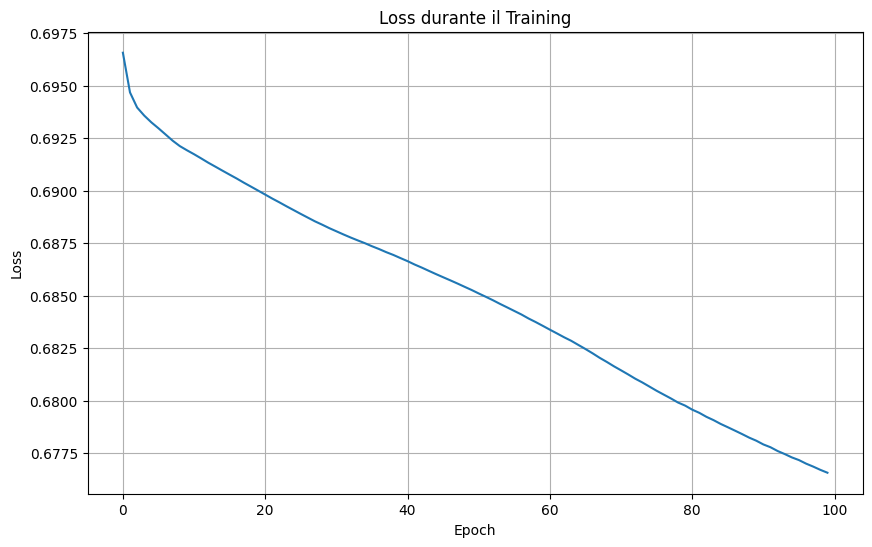

In [42]:
plt.figure(figsize=(10, 6))
plt.title("Loss durante il Training")
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(losses)
plt.show()

# 4. Pytorch on steroids

Ora che abbiamo capito come funziona il loop di training, possiamo semplificare ulteriormente il processo con [Pytorch Lightning](https://lightning.ai/docs/pytorch/stable/starter/introduction.html)

In [ ]:
!uv add lightning

In [50]:
import lightning as L
from lightning.pytorch.loggers import WandbLogger

### Lightining maschera (quasi) tutto il processo di training, l'utente deve solo fornire lo scheletro del neural network,  definire il flusso dei dati all'interno del neural network, la funzione di loss e l'ottimizzatore  

In [ ]:
class LitNN(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = NeuralNetwork()
        self.loss_fn = nn.BCEWithLogitsLoss()
        
        self.save_hyperparameters()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        X, y = batch
        logits = self(X)
        loss = self.loss_fn(logits, y)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.001)

Si definisce il Trainer per fare il fitting del modello sui dati

In [ ]:
litmodel = LitNN()
trainer = L.Trainer(
    accelerator="gpu", # "cpu", "tpu", "hpu", "auto",
    devices=1, # [1, 2] per specificare quale GPU usare
    max_epochs=100,
    # default_root_dir="some/path/",
    # strategy="ddp", # per il training distribuito
    # accumulate_grad_batches=1, # per gradient accumulation su batches
    # deterministic=False, # per riproducibilità
    # gradient_clip_val=None, # o un float per il clipping, per evitare exploding gradients
    # precision="16-mixed", # per la precisione dei calcoli
    # profiler="simple", # "advanced", "pytorch", or a custom profiler
    # enable_progress_bar=True,
    # val_check_interval=1, # per validazione ogni n epoch (se float) o n batches (se int)
    # logger=WandbLogger(project="lightning-intro"),
    # callbacks=[
        # L.callbacks.ModelCheckpoint(monitor="train_loss"),
        # L.callbacks.LearningRateMonitor(logging_interval="step"),
        # L.callbacks.EarlyStopping(monitor="train_loss", patience=5),
        # L.callbacks.RichProgressBar(),],
    # altri tanti parametri...
    )

trainer.fit(
    model = litmodel,
    train_dataloaders=dataloader,
    # val_dataloaders=None,
    # ckpt_path="some/path/", # per riprendere il training da un checkpoint
)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5]

  | Name    | Type              | Params | Mode 
------------------------------------------------------
0 | model   | NeuralNetwork     | 161    | train
1 | loss_fn | BCEWithLogitsLoss | 0      | train
------------------------------------------------------
161       Trainable params
0         Non-trainable params
161       Total params
0.001     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████| 32/32 [00:00<00:00, 323.07it/s, v_num=1]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 32/32 [00:00<00:00, 314.48it/s, v_num=1]


## Perche' usare Lightning?

I vantaggi che offre Lightning sono molteplici
- Struttura del codice più pulita e modulare
- Gestione automatica di device e precisione di training
- Facile gestione di checkpointing, logging e resume di training
- Scalabilita', riproducibilita', e integrazione di metodi come 
    - early stopping,
    - scheduling di learning rate,
    - gradient clipping,
    - profiler per le prestazioni

## e i svantaggi?
- una curva di apprendimento iniziale
- debug e' piu\ complicato
- meno controllo su finezze
- alcune astrazioni non facili da capire
- aggiornamenti dirompenti...

# Come fare un grid search efficiente?

Ray offre una potente scalabilita' di training quando si ha tante risorse computazionali (e.g. cluster, multi-gpu) 

Lightning e Ray sono compatibili per essere usati assieme

In particolare vedremo Ray Tune, per ottimizzare il processo di selezione di iper parametri

In [ ]:
!uv add ray[tune]

Ray Tune puo' essere utilizzato per allenare direttamente i modelli di scritti su Pytorch, ma delle volte puo' essere molto difficile gestire allocazioni di dati che se sono su device diversi, puo' risultare molto impegantivo fare il debugging.

Quindi, qui l'obiettivo e' integrare in modo facile la ricerca di iper parametri con una backbone pronta per essere allenata.

### N.B. assicurarsi che il trainer di Lightning funziona e produce risultati sensati, altrimenti fare il debugging con Ray e' assurdo.

Per fare il grid search, dobbiamo decidere quali sono gli iper parametri da cercare

Ridefiniamo un attimo il modello di lightning per essere piu' flessibili

In [ ]:
class ConfigurableLitNN(L.LightningModule):
    def __init__(self, learning_rate=0.001, optimizer='Adam'):
        super().__init__()
        self.model = NeuralNetwork()
        
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        
        self.save_hyperparameters()
        
    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        X, y = batch
        logits = self(X)
        loss = self.loss_fn(logits, y)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        if self.optimizer == 'Adam':
            return Adam(self.parameters(), lr=self.learning_rate)
        elif self.optimizer == 'SGD':
            return SGD(self.parameters(), lr=self.learning_rate)
        elif self.optimizer == 'RMSprop':
            return RMSprop(self.parameters(), lr=self.learning_rate)
        else:
            raise ValueError(f"Optimizer {self.optimizer} not supported.")

definiamo lo spazio di ricerca

In [ ]:
config = {
    "learning_rate": tune.loguniform(1e-4, 1e-1),
    "optimizer": tune.choice(['Adam', 'SGD', 'RMSprop']),
}

la funzione obiettivo

In [ ]:
def objective(config):
    model = ConfigurableLitNN(
        learning_rate=config["learning_rate"],
        optimizer=config["optimizer"],
    )
    trainer = L.Trainer(
        accelerator="gpu",
        devices=1,
        max_epochs=10,
        enable_progress_bar=False,
    )
    trainer.fit(
        model=model,
        train_dataloaders=dataloader,
    )
    tune.report(train_loss=trainer.callback_metrics["train_loss"].item())
    return

definiamo l'algoritmo di ricerca

In [ ]:
from ray.tune.search.optuna import OptunaSearch

search_alg = OptunaSearch(
    metric="train_loss",
    mode="min",
)


In [ ]:
tuner = tune.Tuner(
    objective,
    tune_config=tune.TuneConfig(
        num_samples=10,
        search_alg=search_alg,
    ),
    param_space=config,
)
results = tuner.fit()
print("Miglior risultato:", results.get_best_result("train_loss", "min"))

Ci sono un po' di problemi con Ray

- salva troppi dati temporanei per poter ripendere la training (nello swap)
- (quasi) impossibile fare debugging
- crea un workspace temporaneo per la computazione distribuita, quindi path relativi si rompono facilmente